In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def make_classification(d, n, u=5, threshold=0.25, random_state=1):
    """
    This function generates a set of points in a
    'd' dimensional real space. Each point will lie in
    the boundary [-u, u] in each direction of the space.

    d: the dimension of the space
    
    n: the number of data points
    
    u: the range in which the data points will be generated.
    Should be no greater than 5.

    random_state: the seed for generating random points
    """
    # create a random number generator based on
    # the given random_state
    rng = np.random.default_rng(random_state)
    # create a random normal vector to define a hyperplane
    normal_vector = rng.random(d)
    normal_vector /= np.linalg.norm(normal_vector)
    
    # uniform set of joint angles
    data_points = rng.uniform(
        low=-u,  # lower bound
        high=u,  # upper bound
        # Generate a (n x d) array
        size=(n, d)
    )

    # computing the inner products
    inner_products = np.dot(data_points, normal_vector)
   
    # removing points on the line
    points_near_line = np.abs(inner_products) >= threshold
    data_points = data_points[points_near_line]
    inner_products = inner_products[points_near_line]
    n = inner_products.shape[0]
    
    # generating the labels for each point
    labels = np.where(inner_products < 0, -1, 1)

    # appending the labels to the data points
    data_points = np.hstack((data_points, labels.reshape(n, 1)))

    return (data_points, normal_vector)

In [43]:
d = 2
u = 1
treshold = 0.05
n = 1000

data_points, normal_vector = make_classification(d=d, n=n, u=u, threshold=0.15)
print(data_points[:5])
print(data_points.shape)

[[-0.71168077  0.89729889  1.        ]
 [-0.3763371  -0.1533471  -1.        ]
 [ 0.65540519 -0.18160173  1.        ]
 [ 0.09918738 -0.94488177 -1.        ]
 [ 0.50702622  0.07628663  1.        ]]
(836, 3)


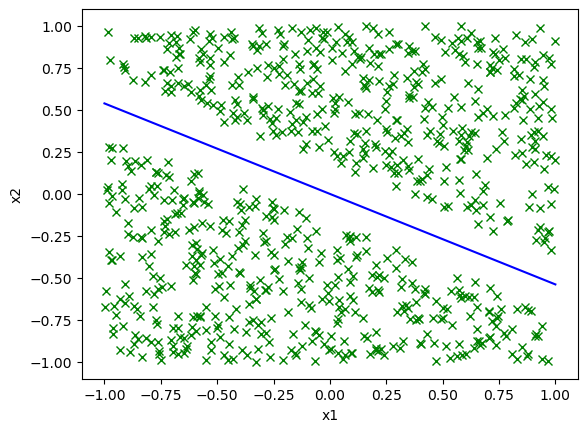

In [44]:
# plotting line and data points
x1_vals = np.linspace(-u, u, 100)
# solving for x2 values x2 = (-a1 / a2) * x1
x2_vals = - (normal_vector[0] / normal_vector[1]) * x1_vals

plt.plot(data_points[:, 0], data_points[:, 1], 'xg')
plt.plot(x1_vals, x2_vals, '-b')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()